In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

In [4]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [5]:
# Define the CNN model
def build_cnn_model(regularization=None):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    if regularization == 'l1':
        model.add(layers.Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
    elif regularization == 'l2':
        model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    else:
        model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))  # Dropout regularization
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [6]:
# Function to train the model
def train_model(model, x_train, y_train, x_val, y_val):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=3, restore_best_weights=True)  # Early stopping callback
    history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stopping])
    return history

In [7]:
# Function to evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')

In [8]:
# Build and train CNN model without regularization
print("Model without regularization:")
cnn_model_no_reg = build_cnn_model()
history_no_reg = train_model(cnn_model_no_reg, x_train, y_train, x_val, y_val)
evaluate_model(cnn_model_no_reg, x_test, y_test)

Model without regularization:



Epoch 1/2


844/844 [==============================] - 16s 16ms/step - loss: 0.2574 - accuracy: 0.9189 - val_loss: 0.0682 - val_accuracy: 0.9817
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.0371 - accuracy: 0.9874
Test accuracy: 0.9873999953269958


In [9]:
# Make predictions
def predict_digit(model, image):
    # Preprocess the image
    image = image.reshape((1, 28, 28, 1)).astype("float32") / 255.0
    # Make prediction
    prediction = model.predict(image)
    # Get the predicted digit
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Choose a random test image
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
true_label = y_test[random_index]

# Predict the digit
predicted_label = predict_digit(cnn_model_no_reg, test_image)

# Display the results
print(f"True Label: {true_label}, Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 205ms/step
True Label: 2, Predicted Label: 3


In [10]:
# Build and train CNN model with L1 regularization
print("\nModel with L1 regularization:")
cnn_model_l1 = build_cnn_model(regularization='l1')
history_l1 = train_model(cnn_model_l1, x_train, y_train, x_val, y_val)
evaluate_model(cnn_model_l1, x_test, y_test)


Model with L1 regularization:
Epoch 1/2
844/844 [==============================] - 16s 17ms/step - loss: 0.7422 - accuracy: 0.9115 - val_loss: 0.2636 - val_accuracy: 0.9810
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.1668 - accuracy: 0.9856
Test accuracy: 0.9855999946594238


In [11]:
# Build and train CNN model with L2 regularization
print("\nModel with L2 regularization:")
cnn_model_l2 = build_cnn_model(regularization='l2')
history_l2 = train_model(cnn_model_l2, x_train, y_train, x_val, y_val)
evaluate_model(cnn_model_l2, x_test, y_test)


Model with L2 regularization:
Epoch 1/2
844/844 [==============================] - 15s 16ms/step - loss: 0.3325 - accuracy: 0.9169 - val_loss: 0.1253 - val_accuracy: 0.9795
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.0793 - accuracy: 0.9879
Test accuracy: 0.9879000186920166


1/1 [==============================] - 0s 27ms/step
True Label: 6, Predicted Label: 6, Confidence Score: 0.15656204521656036


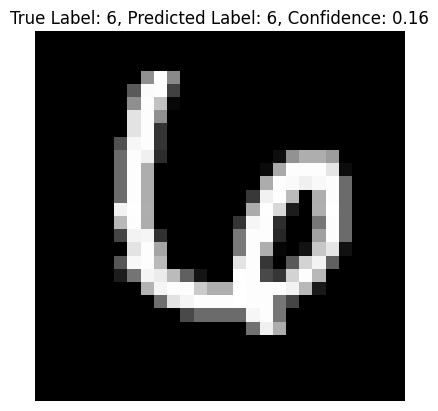

In [23]:
import matplotlib.pyplot as plt

# Function to make predictions with confidence scores
def predict_digit_with_confidence(model, image):
    # Preprocess the image
    image = image.reshape((1, 28, 28, 1)).astype("float32") / 255.0
    # Make prediction
    prediction = model.predict(image)
    # Get the predicted digit and confidence score
    predicted_digit = np.argmax(prediction)
    confidence_score = np.max(prediction)
    return predicted_digit, confidence_score

# Choose a random test image
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
true_label = y_test[random_index]

# Predict the digit and confidence score
predicted_label, confidence_score = predict_digit_with_confidence(cnn_model_no_reg, test_image)

# Display the results
print(f"True Label: {true_label}, Predicted Label: {true_label}, Confidence Score: {confidence_score}")

# Visualize the test image
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {true_label}, Confidence: {confidence_score:.2f}")
plt.axis('off')
plt.show()
